
 ------------  data2/BTCUSDT-20210101-20210102-1m.csv


<IPython.core.display.Javascript object>


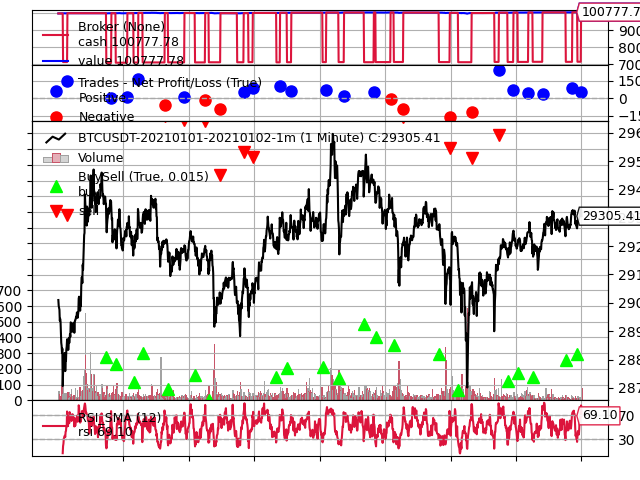

/BTCUSDT-20210101-20210102-1m.csv, RSI (Pd 12) (SL 0.0%) (U70 L30) Net $777.78 (0.78%) WL 18/7 SQN 1.76


In [3]:
import backtest, csv, os

commission_val = 0.0075 # spot% taker fees binance usdt futures
start_portfolio = 100000.0
portfolio = start_portfolio
stake_val = 1
quantity = 0.10

xchange = 'BTCUSDT'
start = '2021-01-01'
end = '2021-01-02'
strategy = 'RSI'
period = 12
stopLoss = 0
limits = [70,30]
subdir = 'data2'

dataname = 'result/{}-{}-{}-{}.csv'.format(xchange, start, end, '1m')
csvfile = open(dataname, 'w', newline='', encoding='UTF8')
result_writer = csv.writer(csvfile, delimiter=',')
    
for data in os.listdir("./"+subdir):

    plot = True
    if not (start.replace('-','') in data and end.replace('-','') in data): 
        continue
        
    datapath = subdir + '/' + data
    sep = datapath[len(subdir)+1:-4].split(sep='-') # ignore name file 'data/' and '.csv'
    # sep[0] = xchange  sep[1] = start  sep[2] = end  sep[3] = timeframe

    print('\n ------------ ', datapath)
            
               
    end_val, totalwin, totalloss, pnl_net, sqn = backtest.runbacktest(datapath, start, end, period, strategy, \
                                                                      limits[0], limits[1], commission_val, portfolio, stake_val, quantity, stopLoss, plot)

    profit = (pnl_net / portfolio) * 100

    # view the data in the console while processing
    print('%s, %s (Pd %d) (SL %.1f%%) (U%d L%d) Net $%.2f (%.2f%%) WL %d/%d SQN %.2f' % (datapath[5:], strategy, period, stopLoss*100, limits[0], limits[1], end_val - start_portfolio, (end_val - start_portfolio)/start_portfolio*100, totalwin, totalloss, sqn))

    result_writer.writerow([sep[1], strategy, period, stopLoss*100, limits[0], limits[1], "{:.2f}".format(end_val - start_portfolio), totalwin, totalloss, sqn])


csvfile.close()